# No Regularization

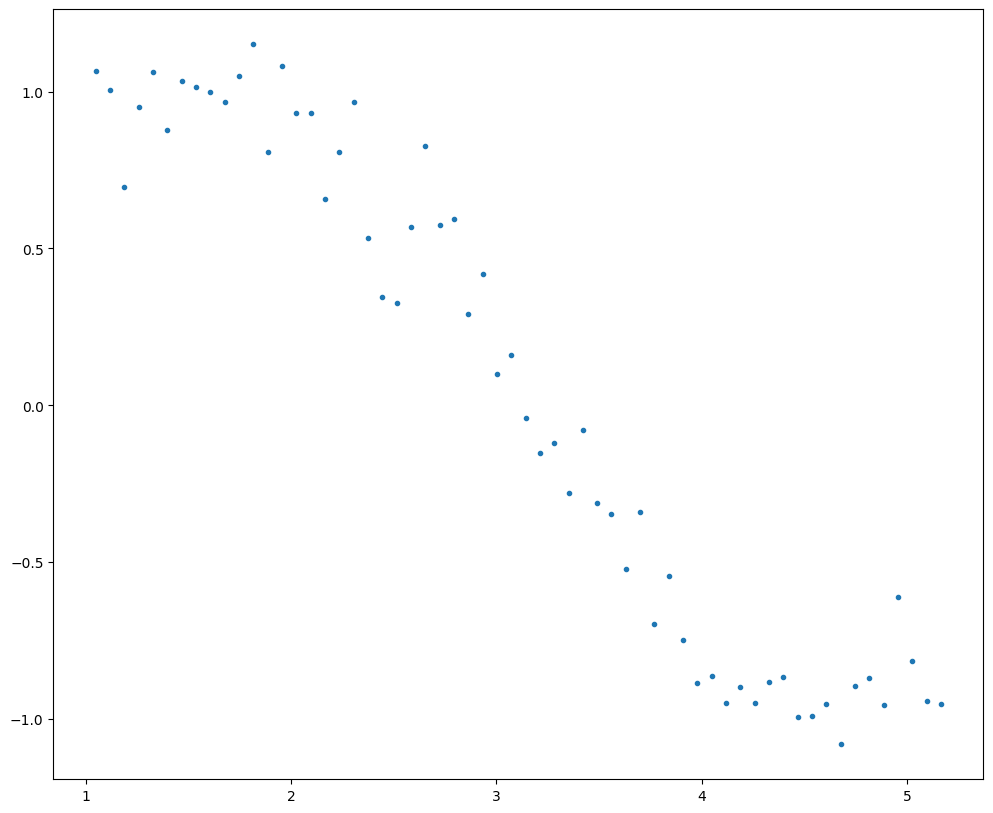

In [25]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

In [26]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.head())

    x    y  x_2  x_3  x_4  x_5  x_6  x_7  x_8  x_9  x_10  x_11  x_12  x_13  \
0   1  1.1  1.1  1.1  1.2  1.3  1.3  1.4  1.4  1.5   1.6   1.7   1.7   1.8   
1 1.1    1  1.2  1.4  1.6  1.7  1.9  2.2  2.4  2.7     3   3.4   3.8   4.2   
2 1.2  0.7  1.4  1.7    2  2.4  2.8  3.3  3.9  4.7   5.5   6.6   7.8   9.3   
3 1.3 0.95  1.6    2  2.5  3.1  3.9  4.9  6.2  7.8   9.8    12    16    19   
4 1.3  1.1  1.8  2.3  3.1  4.1  5.4  7.2  9.6   13    17    22    30    39   

   x_14  x_15  
0   1.9     2  
1   4.7   5.3  
2    11    13  
3    24    31  
4    52    69  


C:\Windows\Temp\ipykernel_19076\3760966551.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\3760966551.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\3760966551.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\3760966551.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\3760966551.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


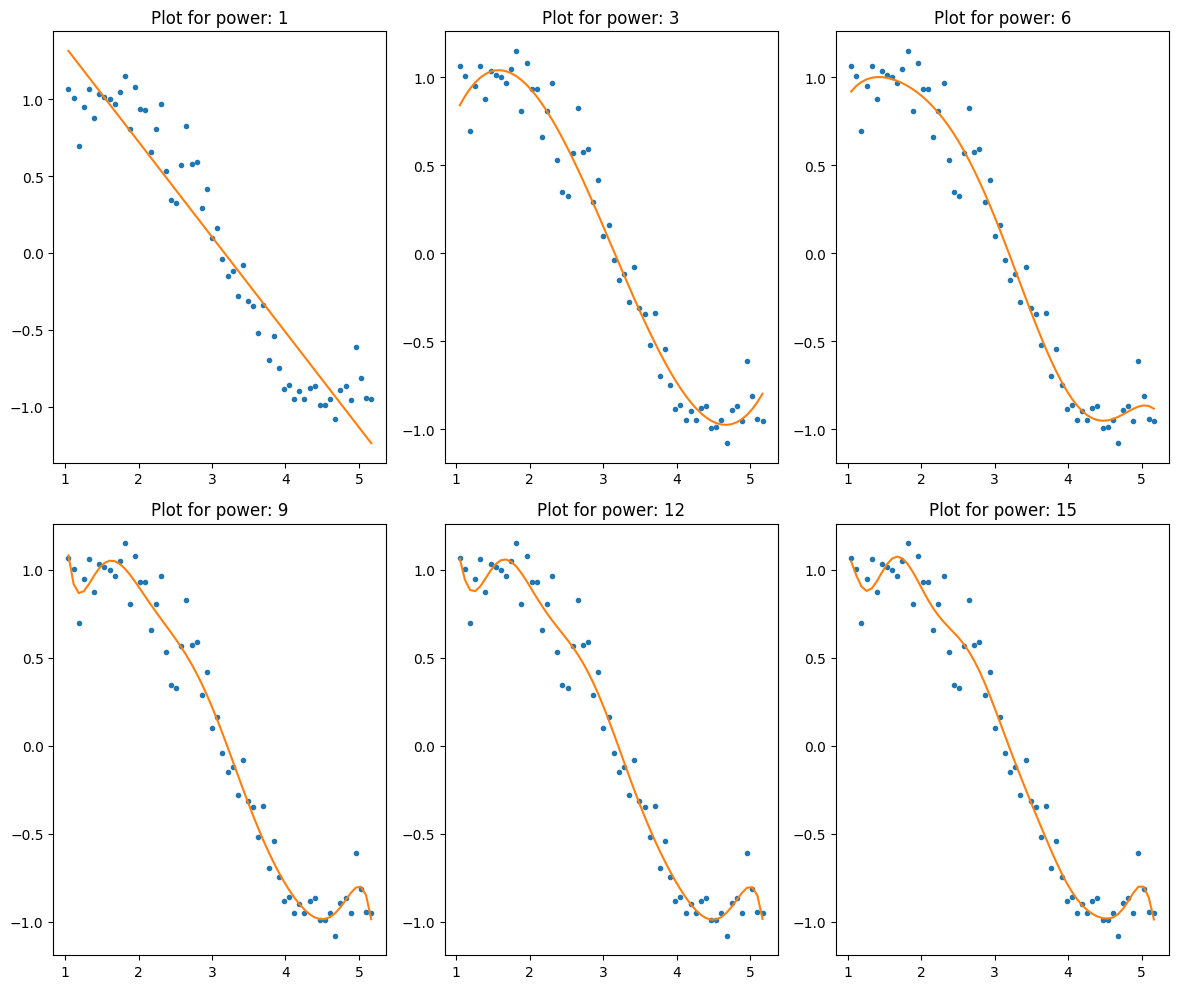

In [27]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression()
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    rcParams['figure.figsize'] = 12, 10
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],data['y'],'.')
        plt.plot(data['x'],y_pred)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [28]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


# Ridge Regression (L2 Norm)

C:\Windows\Temp\ipykernel_19076\2102911298.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\2102911298.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\2102911298.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_19076\2102911298.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
E:\pythonProject4\venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.93682e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
E:\pythonProject4\venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.67054e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Windows\Temp\ipykernel_19076\2102911298.py:11: 

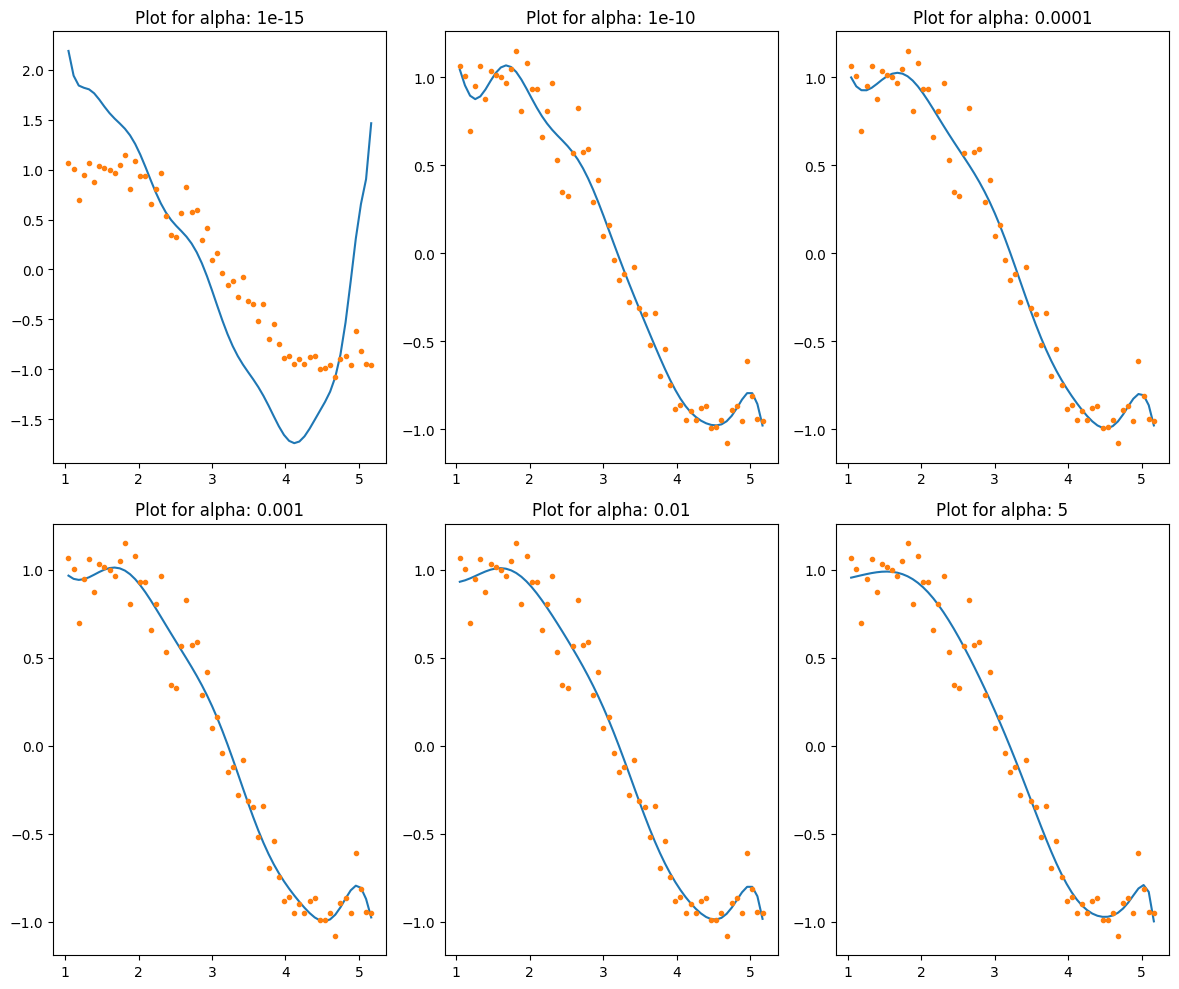

In [29]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [30]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,33,-2.8e+04,1.9e+05,-5.9e+05,1.1e+06,-1.4e+06,1.3e+06,-8.4e+05,4.2e+05,-1.6e+05,4.6e+04,-1e+04,1.6e+03,-1.9e+02,15,-0.71,0.016
alpha_1e-10,0.85,75,-6.5e+02,2e+03,-2.8e+03,1.1e+03,2e+03,-3.8e+03,3.3e+03,-1.8e+03,6.9e+02,-1.9e+02,36,-4.8,0.43,-0.023,0.00055
alpha_1e-08,0.87,-5.8,65,-1.1e+02,-9.5,1.3e+02,-49,-1.2e+02,1.8e+02,-1.2e+02,49,-13,2.5,-0.32,0.026,-0.0013,2.6e-05
alpha_0.0001,0.89,6.3,-5.9,-3.3,2.2,4,0.019,-3.6,-0.14,3.4,-2.8,1.1,-0.28,0.044,-0.0042,0.00022,-5e-06
alpha_0.001,0.91,2.5,-1.4,-1.1,0.095,0.93,0.58,-0.45,-0.61,0.32,0.31,-0.36,0.16,-0.038,0.0053,-0.00041,1.4e-05
alpha_0.01,0.93,1.2,-0.31,-0.28,-0.011,0.26,0.25,-0.064,-0.28,0.0022,0.29,-0.24,0.094,-0.022,0.0029,-0.00022,7.2e-06
alpha_1,0.94,0.87,0.0073,0.018,0.027,0.027,0.012,-0.011,-0.02,-0.0017,0.017,-0.0084,0.0011,0.00029,-0.00012,1.5e-05,-7e-07
alpha_5,0.95,0.92,0.0032,0.0076,0.012,0.013,0.0096,0.0013,-0.007,-0.0079,0.00076,0.0089,-0.0068,0.0023,-0.00042,3.9e-05,-1.5e-06
alpha_10,0.95,0.93,0.0025,0.0059,0.0091,0.01,0.0079,0.0012,-0.0061,-0.0068,0.0016,0.0064,-0.0052,0.0018,-0.00032,3e-05,-1.2e-06
alpha_20,0.95,0.95,0.0017,0.004,0.0064,0.0075,0.0061,0.0015,-0.0043,-0.0059,0.00056,0.0059,-0.0045,0.0015,-0.00027,2.5e-05,-9.7e-07


In [31]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int32

# Lasso Regression (L1 Norm)

E:\pythonProject4\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
E:\pythonProject4\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
E:\pythonProject4\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.805e-01, tolerance: 3.6

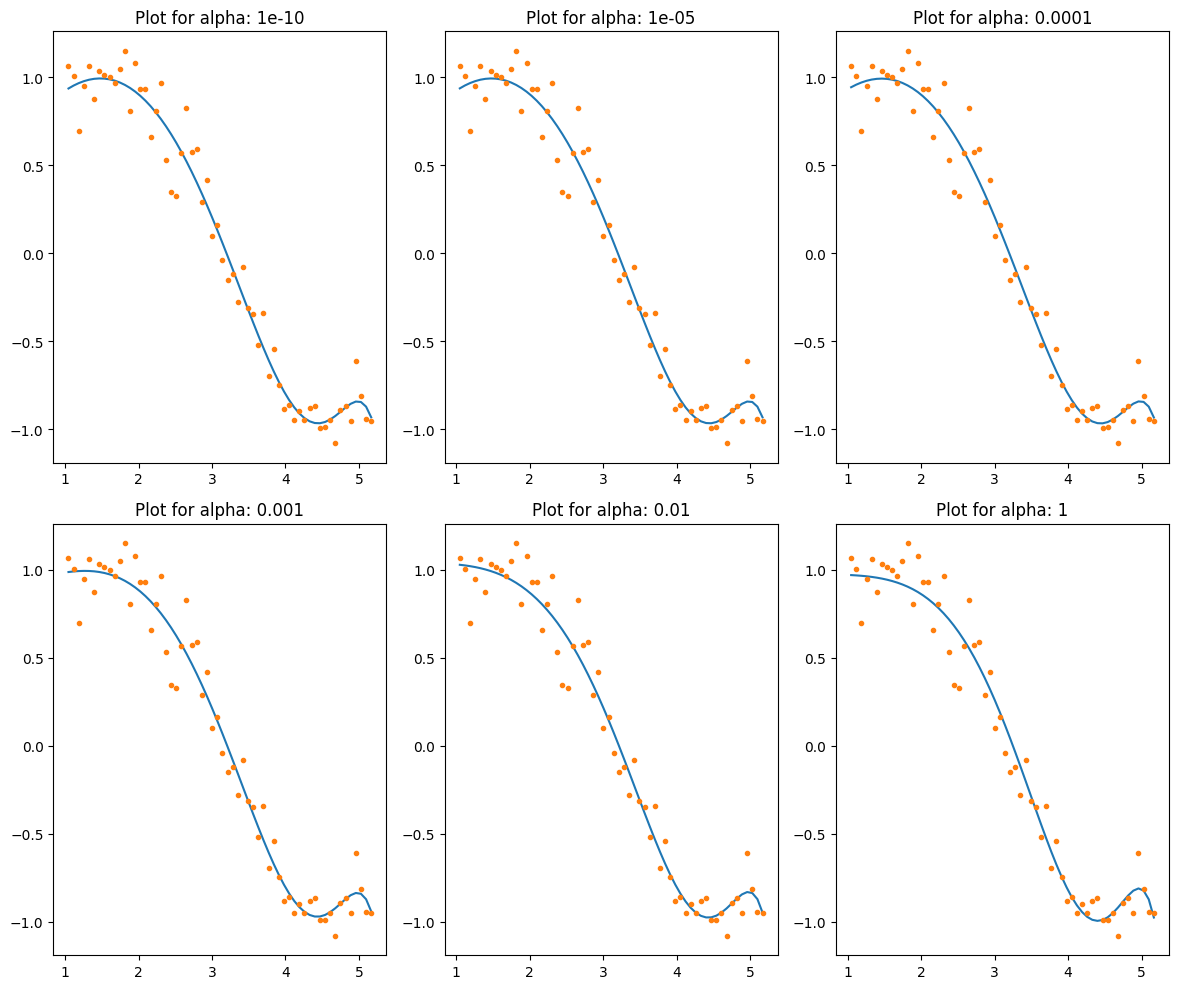

In [32]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=10000)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [33]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.4,0.74,-0.19,-0.025,-0.0023,-3e-05,5.4e-05,1.7e-05,3.9e-06,7.2e-07,1.1e-07,1.3e-08,5.7e-10,-3.1e-10,-1.5e-10,-4.5e-11
alpha_1e-10,0.96,0.4,0.74,-0.19,-0.025,-0.0023,-3e-05,5.4e-05,1.7e-05,3.9e-06,7.2e-07,1.1e-07,1.3e-08,5.7e-10,-3.1e-10,-1.5e-10,-4.5e-11
alpha_1e-08,0.96,0.4,0.74,-0.19,-0.025,-0.0023,-3e-05,5.4e-05,1.7e-05,3.9e-06,7.2e-07,1.1e-07,1.3e-08,5.7e-10,-3.1e-10,-1.5e-10,-4.5e-11
alpha_1e-05,0.96,0.41,0.73,-0.18,-0.025,-0.0023,-2.7e-05,5.4e-05,1.7e-05,3.9e-06,7.2e-07,1.1e-07,1.3e-08,5.6e-10,-3.2e-10,-1.5e-10,-4.5e-11
alpha_0.0001,0.96,0.47,0.63,-0.13,-0.032,-0.0025,-4.4e-06,6.1e-05,1.8e-05,4e-06,7.2e-07,1.1e-07,1.3e-08,5e-10,-3.3e-10,-1.5e-10,-4.5e-11
alpha_0.001,0.97,0.92,0,0.14,-0.063,-0.0053,7.9e-05,0.00011,2.5e-05,4.7e-06,7.7e-07,1.1e-07,1.1e-08,4.6e-11,-4e-10,-1.6e-10,-4.5e-11
alpha_0.01,0.99,1,0,0,0.0039,-0.012,-0.00088,0.00011,3.7e-05,6.7e-06,1e-06,1.3e-07,1.1e-08,-2.9e-10,-5.1e-10,-1.8e-10,-4.9e-11
alpha_1,1,0.98,-0,-0,-0,-0,-0.0033,-0.00043,0.00011,2e-05,1.7e-06,9.9e-08,-5.6e-09,-3.8e-09,-1e-09,-2.2e-10,-4.3e-11
alpha_5,1.2,0.92,-0,-0,-0,-0,-0,-0.0013,-2.1e-05,4.3e-05,4.3e-06,2.7e-07,-5.5e-09,-6.6e-09,-1.7e-09,-3.4e-10,-6e-11
alpha_10,1.4,0.89,-0,-0,-0,-0,-0,-0.00077,-0.00018,3.7e-05,7e-06,5.2e-07,1.4e-08,-6.1e-09,-2e-09,-4.4e-10,-8.4e-11


In [34]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     1
alpha_0.01      2
alpha_1         4
alpha_5         5
alpha_10        5
dtype: int32